<h1 style="color: violet;">Resort Pool Management System</h1>

In [1]:
## Installing open-cv

In [9]:
!pip install opencv-python==4.9.0.80

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_v

### *Colab has been used to train the model below is the training code for coalb* 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20  Python-3.8.8 torch-2.1.2+cpu CPU
Setup complete  (12 CPUs, 31.3 GB RAM, 741.9/893.9 GB disk)


### *Start the YOLOv8 training process for object detection*

- This code runs on Google Colab (TPU) not on CPU
- Hence, we ran this code on Google Colab to generate the best model (best.pt)

In [8]:
!yolo task=detect mode=train model=yolov8s.pt data=C:/Python/SwimmingPool/SP_yolo8/data.yaml epochs=100 imgsz=800 plots=True

^C


### *Inference code (download the trained model and load it for running on video and images. )*

In [3]:
from ultralytics import YOLO
import cv2

In [4]:
model = YOLO("best.pt")

In [5]:
input_image_path = "C:\\Python\\SwimmingPool\\val_data\\ss.jpg"  
image = cv2.imread(input_image_path)

In [6]:
result=model.predict(image,save=True)

Ultralytics YOLOv8.0.20  Python-3.8.8 torch-2.1.2+cpu CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs\detect\predict3


In [7]:
class_labels = ["Empty", "Occupied"]

### For running on images.

In [8]:
import cv2
print(cv2.__version__)

4.9.0


In [10]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_v

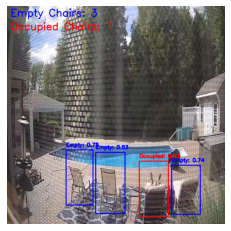

In [9]:
import cv2
from matplotlib import pyplot as plt

# Your existing code for processing the image
input_image_path = "C:\\Python\\SwimmingPool\\val_data\\ss.jpg"  
image = cv2.imread(input_image_path)
result = model.predict(image)
empty = 0
occupied = 0
for box in result[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  
    conf = box.conf[0].item()  
    class_id = int(box.cls[0].item())  
    if class_id == 0:  
        empty += 1
    else:
        occupied += 1
        
    label = f"{class_labels[class_id]}: {conf:.2f}"
    color = (255, 0, 0) if class_id == 0 else (0, 0, 255)  
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

text1 = f"Empty Chairs: {empty}"
text2 = f"Occupied Chairs: {occupied}"

cv2.putText(image, text1, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2) 
cv2.putText(image, text2, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)  

output_image_path = "output_image6.jpg"  # Path to save the result
cv2.imwrite(output_image_path, image)

# Use Matplotlib to display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

### For running on saved video

In [10]:
# Open video source
video_capture = cv2.VideoCapture("C:\\Python\\SwimmingPool\\val_data\\vid.mp4")  # Replace with your video path

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define display dimensions
display_width = 800
display_height = 600

# Define the codec and create VideoWriter object
output_path = "output_video.mp4"  # Path to save the output video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec for .mp4 format
video_writer = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

frame_number = 0
while True:
    ret, frame = video_capture.read()
    if not ret:
        break  # Exit if the video ends or frame cannot be read

    empty = 0
    occupied = 0

    # Run detection on the frame
    result = model.predict(frame)
    for box in result[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        class_id = int(box.cls[0].item())  # Class ID

        # Update counts
        if class_id == 0:
            empty += 1
        else:
            occupied += 1

        # Draw bounding box and label
        label = f"{class_labels[class_id]}: {conf:.2f}"
        color = (255, 0, 0) if class_id == 0 else (0, 0, 255)  # Color for empty/occupied
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Add total counts to the frame
    text1 = f"Empty Chairs: {empty}"
    text2 = f"Occupied Chairs: {occupied}"
    cv2.putText(frame, text1, (20, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2)  # Blue for empty
    cv2.putText(frame, text2, (20, 70), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 255), 2)  # Red for occupied

    # Write the processed frame to the output video
    video_writer.write(frame)

    # Resize frame for display
    display_frame = cv2.resize(frame, (display_width, display_height))
    cv2.imshow("Chair Detection", display_frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
    cv2.imwrite(f"output_frame_{frame_number}.jpg", frame)
    frame_number += 1

# Release resources
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()

### For live camera.

In [20]:
# Open video source
video_capture = cv2.VideoCapture(0)  # Replace with your video path

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define display dimensions
display_width = 800
display_height = 600

# Define the codec and create VideoWriter object
output_path = "output_video.mp4"  # Path to save the output video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec for .mp4 format
video_writer = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = video_capture.read()
    if not ret:
        break  # Exit if the video ends or frame cannot be read

    empty = 0
    occupied = 0

    # Run detection on the frame
    result = model.predict(frame)
    for box in result[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        class_id = int(box.cls[0].item())  # Class ID

        # Update counts
        if class_id == 0:
            empty += 1
        else:
            occupied += 1

        # Draw bounding box and label
        label = f"{class_labels[class_id]}: {conf:.2f}"
        color = (255, 0, 0) if class_id == 0 else (0, 0, 255)  # Color for empty/occupied
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Add total counts to the frame
    text1 = f"Empty Chairs: {empty}"
    text2 = f"Occupied Chairs: {occupied}"
    cv2.putText(frame, text1, (20, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2)  # Blue for empty
    cv2.putText(frame, text2, (20, 70), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 255), 2)  # Red for occupied

    # Write the processed frame to the output video
    video_writer.write(frame)

    # Resize frame for display
    display_frame = cv2.resize(frame, (display_width, display_height))
    cv2.imshow("Chair Detection", display_frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()



0: 608x800 1 occupied, 370.1ms
Speed: 4.8ms preprocess, 370.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 occupied, 358.0ms
Speed: 7.0ms preprocess, 358.0ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 occupied, 350.6ms
Speed: 5.5ms preprocess, 350.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 occupied, 375.6ms
Speed: 6.0ms preprocess, 375.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 occupied, 361.5ms
Speed: 4.6ms preprocess, 361.5ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 occupied, 400.3ms
Speed: 6.5ms preprocess, 400.3ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 occupied, 374.5ms
Speed: 6.0ms preprocess, 374.5ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 occupieds, 362.6ms
Speed: 5.0ms preprocess, 362.6ms inference, 1.0ms postpro